# Introduction to PyCaret - An open source low-code ML library

## This notebook consists 2 parts
*         Classification part using Titanic DataSet
*         Regression part using House Price Regression DataSet

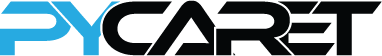

> You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code.

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.


> ### Index :

1. [Installing Pycaret Library](#1)
2. [Classification Task](#2)
3. [Lets split our data into train and test set](#3)
4. [Import whole classification from Pycaret](#4)
5. [Lets Comapre all Classification models ](#5)
6. [Let's create Individual Catboost Classifier](#6)
7. [Let's Hypertune Tune model.](#7)
8. [Plotting various Curves and Matrixs for classification and Regression](#8)
9. [Part2 - Regression](#9)
10. [let's do Catboost Regressor ](#10)
11. [lets hypertune CatBoost Regressor.](#11)


<a id="1"></a><br>
## 1. let's install pycaret !

In [ ]:
!pip install pycaret==1.0.0

# We start by loading the libraries

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split

<a id='2'> </a><br>

## Classification Task

> import Necessary data for classification task 
> Here we are going to use this dataset for classification **pima-indians-diabetes-database** 

In [ ]:
dataset=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
dataset.head()

## lets check for null values or missing values

In [ ]:
dataset.isna().sum()

> Here no null or missing values is present in this dataset. hence we move forward 

<a id='3'></a><br>
## Lets split our data into train and test set

In [ ]:
train,test=train_test_split(dataset,test_size=0.2,random_state=42)

> **print the shape of train set and test set.**

In [ ]:
print('train shape:',train.shape ,'test shape:',test.shape)

<a id='4'></a><br>
# Import whole classification from Pycaret

In [ ]:
from pycaret.classification import *

## lets see what type of data we are dealing with.

In [ ]:
train.head()

In [ ]:
train.describe()

from above chart we can clearly see that train set has no missing values and some columns may required normalization but for this notebook we can ignore it and move forward to our main goal

In [ ]:
clf=setup(data=train,
         target='Outcome',
        numeric_imputation = 'mean',
         silent = True)

<a id='5'></a> <br>

# Lets Comapre all Classification models 

In [ ]:
compare_models()

from above comare_model function we can clearly see that **CatBoost Classifier** out performing hence we can select that using it name.
But to select specific model we have to look for its shaort name which can be see here 

### Classification
* ID	Name
* ‘lr’	Logistic Regression
* ‘knn’	K Nearest Neighbour
* ‘nb’	Naives Bayes
* ‘dt’	Decision Tree Classifier
* ‘svm’	SVM – Linear Kernel
* ‘rbfsvm’	SVM – Radial Kernel
* ‘gpc’	Gaussian Process Classifier
* ‘mlp’	Multi Level Perceptron
* ‘ridge’	Ridge Classifier
* ‘rf’	Random Forest Classifier
* ‘qda’	Quadratic Discriminant Analysis
* ‘ada’	Ada Boost Classifier
* ‘gbc’	Gradient Boosting Classifier
* ‘lda’	Linear Discriminant Analysis
* ‘et’	Extra Trees Classifier
* ‘xgboost’	Extreme Gradient Boosting
* ‘lightgbm’	Light Gradient Boosting
* ‘catboost’	CatBoost Classifier

> see it short name from above table and copy it for future use.

<a id='6'></a><br>
## Let's create Individual Catboost Classifier

> **Note:** Here i got some issue related visuallizing metrics and curves of **CatBoost Classifier** so that why we are not cosidering that but for performance wise catboost is best for this dataset. so to neglate above issue we are going with  **Light Gradient Boosting**

In [ ]:
lightgbm  = create_model('lightgbm')

## Here this model automatically use 10-Fold CV.

<a id='7'></a><br>
## Let's Hypertune Tune model.

In [ ]:
tuned_lightgbm = tune_model('lightgbm')

<a id='8'></a><br>
# Plotting various Curves and Matrixs for classification and Regression

> Note: all plotting terms are similar in both regression and classification task hence i am not going to repeat that if need some help check out here :    
https://pycaret.org/plot-model/

* ## everything in one place isn't it Awasome!! :)) 

In [ ]:
evaluate_model(tuned_lightgbm)

* ## Learning curve plotting

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

* ## AUC Curve

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

* ## Confusion Matrix

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

* ## Feature Importance

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

## Interpretation

In [ ]:
interpret_model(tuned_lightgbm)

## Extra: Blending made easy!

In [ ]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

<a id='9'></a><br>

## Part2 - Regression

## Import Whole Regression

In [ ]:
from pycaret.regression import *

In [ ]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
train.head()

In [ ]:
train.describe()

### here we make all categorical column list 

In [ ]:
categorical_col_list=[i for i in train.columns if train[i].dtypes =='object']
categorical_col_list

In [ ]:
reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = categorical_col_list, 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             silent = True)

## lets Compare scores of different Regression models

In [ ]:
compare_models()

<a id='10'></a><br>
## let's do Catboost Regressor 

In [ ]:
cb = create_model('catboost')

<a id='11'></a><br>
## lets hypertune CatBoost Regressor.

In [ ]:
tuned_cb = tune_model('catboost')

## SHAP Values (impact on model output)

In [ ]:
interpret_model(tuned_cb)

# thank you very much for checking my notebook!